# Generate hydrographs from digital elevation model (DEM)
This notebook demonstrates with a small examplary region (basin upstream of Altenahr, West Germany) how geomorphological unit hydrographs can be derived from a digital elevation model with a spatial resolution of 25m x 25m. Later on the hydrographs are the basis for the quick runoff (QR) modelling and allow for a large number of counterfacual simulations (see notebook XXXXXX.ipynb).

In [5]:
import counterfactual_functions as cf
from IPython.display import Image
import geopandas as gpd
import glob
import os
import shutil

## Creation of basic rasters
Firstly, we need to transform the DEM into the PCRaster format (".map"). Follwing rasters are then created using PCRaster functions. The detailed code can be viewed in the script `counterfactual functions.py`. All results are stored in the folder "input/generated".

Following data is supplied in this repository:
- **dem.tif**: DEM (ref) of the region of the Altenahr basin
- **corine.gpkg**: CORINE (ref) landuse file of the Altenahr basin
- **buek250_cn_classes.gpkg**: soil classes derived from soil map BUEK250 (ref) and manually classified to four soil classes according to the SCS-CN method (ref).
- **scs.csv**:table which connects CORINE landuse codes (CLC18) to curve number values
- **cn_sm_classes.csv**: table of increasing curve numbers for soil moisture class 2 and the corresponding values for soil moisture class 1 and 2.

Following data sets are computed in this step. These files are the basis for the computation of hydrographs.

- sink filling is applied to the DEM (**dem_filled.map**)
- flow direction grid (**flowdir.map**)
- flow accumulation grid (**accu.map**)
- raster and shapefile containing the subbasins (**subbasins.gpkg**, **subbasins_adjusted.map**)
- raster containing the friction values, needed for traveltime calculation (**friction_maidment.map**)
- raster containing the traveltime (in minutes, based on the method by Maidment et al., 1996) of every cell to its respective outlet (**tt_complete.map**)
- shapefile containing the curve number values for every basin and soil moisture class (**soil_landuse_classes.gpkg**). This file is derived from the soil map BUEK250 and the
 landuse (files **buek250_cn_classes.gpkg** and **corine.gpkg**)
Outlets are determined by the intersection of streams with the Strahler-oder 7 upwards with the functions cf.create_outlet_raster and cf.find_intersects and stored in the raster "outlets.map".

Then outlet and flow direction raster are used to delineate the subbasins. Very small subbasins (< 0.45 km²) are removed with the function `counterfactual_functions.remove_small_subbasins`.

In [4]:
files = glob.glob('input/generated/*')
print("Removing previous files")
for f in files:
    os.remove(f)
    
cf.create_basic_files("input/")

Removing previous files
Filling DEM
Creating flow direction grid
Creating accumulation grid
Creating subbasin shape file and raster
Removed 16 outlets
The basin now contains 57 subbasins
0...10...20...30...40...50...60...70...80...90...Creating output input/generated/subbasins_first.gpkg of format GPKG.
100 - done.
Making maidment friction map
Number of outlets: 58
2023-12-19 09:40:34.599597 Starting traveltime
2023-12-19 09:40:35.227469 Traveltime raster complete
2023-12-19 09:40:35.227899 Creating soil landuse shape file for curve number method


<Axes: >

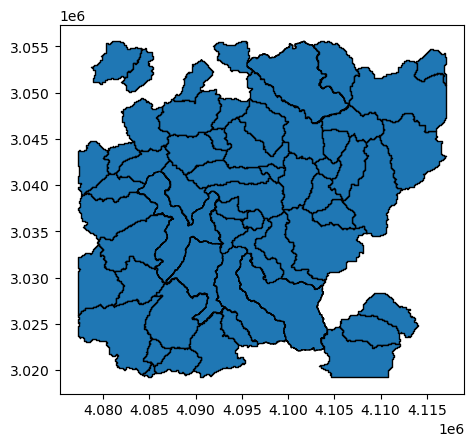

In [15]:
subbasins = gpd.read_file("input/generated/subbasins.gpkg")
subbasins.plot(edgecolor="black")

## Create the files for the individual subbasins
Now that the basic rasters for the whole area have been generated, we can clip the results to the individual subbasins and calculate the hydrograpsh and curve numbers for each subbasin.

In [7]:
files = glob.glob('output/basins/*')
print("Removing previous basin files")
for f in files:
    shutil.rmtree(f)

Removing previous basin files


In [8]:
subbasins = gpd.read_file("input/generated/subbasins.gpkg")
cf.hydrograph_and_cn_for_subbasins(subbasins.DN.to_list())

Creating hydrograph for subbasin 1
Writing outlet dataframe for subbasin 1
Calculating hydrograph for subbasin 1
Calculating curve number for subbasin 1
Creating hydrograph for subbasin 2
Writing outlet dataframe for subbasin 2
Calculating hydrograph for subbasin 2
Calculating curve number for subbasin 2
Creating hydrograph for subbasin 3
Writing outlet dataframe for subbasin 3
Calculating hydrograph for subbasin 3
Calculating curve number for subbasin 3
Creating hydrograph for subbasin 4
Writing outlet dataframe for subbasin 4
Calculating hydrograph for subbasin 4
Calculating curve number for subbasin 4
Creating hydrograph for subbasin 5
Writing outlet dataframe for subbasin 5
Calculating hydrograph for subbasin 5
Calculating curve number for subbasin 5
Creating hydrograph for subbasin 6
Writing outlet dataframe for subbasin 6
Calculating hydrograph for subbasin 6
Calculating curve number for subbasin 6
Creating hydrograph for subbasin 7
Writing outlet dataframe for subbasin 7
Calcula

### View results
Here you can view the traveltime raster and corresponding hydrographs for every subbasin. Just change the subbasin id below.

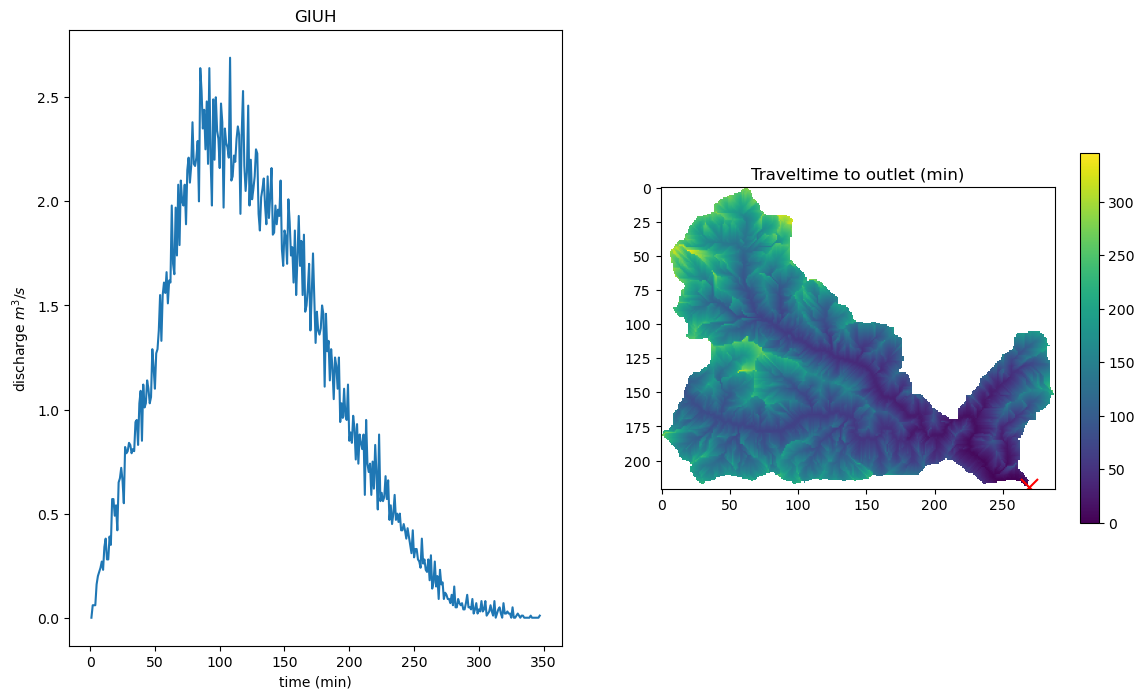

In [9]:
subbasin_id = 46
Image(f'output/giuh_plots/{subbasin_id}_giuh.png')

<Axes: >

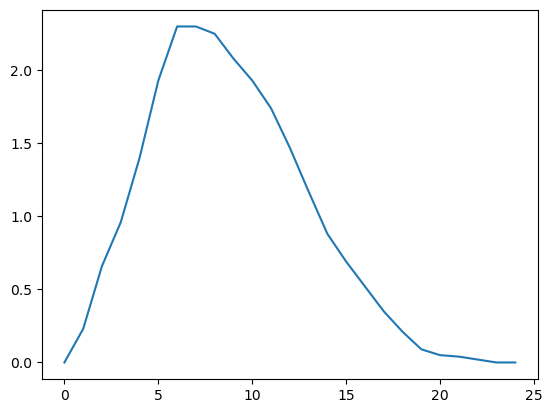

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

ger = pd.read_csv("/home/voit/GIUH/hydrograph_18342.csv")
ger['discharge_m3/s'].plot()